In [258]:
#import libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
#load data
data = np.loadtxt("hw5_q3.csv",delimiter=",", dtype=float)
x = data[:,0:2]
y = data[:,2]

#split into two sets
x_1 = x[0:25]
y_1 = y[0:25]
x_2 = x[25:50]
y_2 = y[25:50]

In [339]:
#define a kernel function
def kernel(x,xp,s):
    k = np.e**(-(1 / (2 * s**2)) * np.linalg.norm(x - xp))
    return k

#define a function to "fill" a matrix with kernel values to make life easier, only works for vector size of 2
def mkernel(x,xp,s):
    dimx = np.size(x) // 2
    dimxp = np.size(xp) // 2
                    
    k = np.zeros((dimx, dimxp))
    
    for i in range(dimx):
        for j in range(dimxp):
            k[i,j] = kernel(x[i],xp[j],s)
    return k

def gpr(x_train, x_test, y_train, s, sigma_2):
    mean = mkernel(x_train, x_test, s).T @ np.linalg.inv(mkernel(x_train,x_train,s) 
                                                         + sigma_2 * np.eye(len(x_train))) @ (y_train - 0)
    covariance = mkernel(x_test, x_test, s) - mkernel(x_train, x_test, s).T @ np.linalg.inv(mkernel(x_train, x_train, s) 
                                                                                            + sigma_2 * np.eye(len(x_train))) @ mkernel(x_train, x_test, s)
    return mean, covariance

def avgmse(x_1, x_2, y_1, y_2, s, sigma_2):
    mean1, covariance1 = gpr(x_1, x_2, y_1, s, sigma_2)
    mean2, covariance2 = gpr(x_2, x_1, y_2, s, sigma_2)
    
    testMSE_1_y_2 = np.sum((y_2 - mean1)**2)
    testMSE_2_y_1 = np.sum((y_1 - mean2)**2)
    
    averageMSE = np.average([testMSE_1_y_2,testMSE_2_y_1])
    
    return averageMSE

In [366]:
s_iterations = np.logspace(-3,3,10)
noise_iterations = np.logspace(-3,3,10)
avgMSE = np.zeros((10,10))
for i in range(len(s_iterations)):
    for j in range(len(noise_iterations)):
        avgMSE[i,j] = avgmse(x_1,x_2,y_1,y_2,s_iterations[i], noise_iterations[j])

In [388]:
from matrepr import mdisplay, mprint
mdisplay(avgMSE, title=None, row_labels=s_iterations, col_labels=noise_iterations)

,0.001,0.004642,0.02154,0.1,0.4642,2.154,10,46.42,215.4,1000
0.001,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2
0.004642,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2
0.02154,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2
0.1,24.82,24.83,24.89,25.14,26.01,27.6,28.72,29.08,29.17,29.19
0.4642,3.504,3.527,3.639,4.191,6.558,13.17,21.99,27.1,28.71,29.09
2.154,2.312,2.527,3.699,7.842,15.93,23.63,27.02,28.29,28.92,29.13
10,3.605,7.621,15.59,23.4,26.83,27.75,28.04,28.48,28.95,29.14
46.42,15.57,23.39,26.83,27.75,27.96,28,28.09,28.49,28.96,29.14
215.4,26.83,27.75,27.96,28,28.01,28.02,28.09,28.49,28.96,29.14
1000,27.96,28,28.01,28.02,28.01,28.02,28.09,28.5,28.96,29.14


In [390]:
#define minimal constants
sn = s_iterations[5]
sigma_2n = noise_iterations[0]

In [391]:
#predictions for new points
x_new = np.array([[0,2], [1.8,1.8], [2,1], [0.5,0.5]])

nmean, ncovariance = gpr(x, x_new, y, sn, sigma_2n)

In [392]:
#array of spaced points to compute with
m = 30

x1value = np.linspace(0,2,m)
x2value = np.linspace(0,2,m)
x1v, x2v = np.meshgrid(x1value, x2value)
xt = np.reshape(np.array([x1v, x2v]), (2, m**2)).T

vmean, vcovariance = gpr(x, xt, y, sn, sigma_2n)

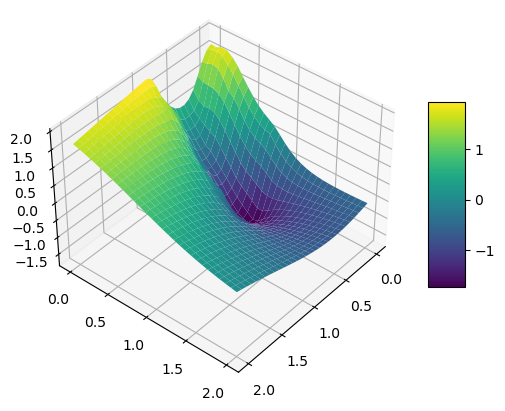

In [393]:
#plot gaussian process mean
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surface = ax.plot_surface(x1v,x2v,np.reshape(vmean, (m,m)), cmap=cm.viridis,linewidth=0, antialiased=True)
fig.colorbar(surface, shrink=0.5, aspect=5)
ax.view_init(40, 40)
plt.show()

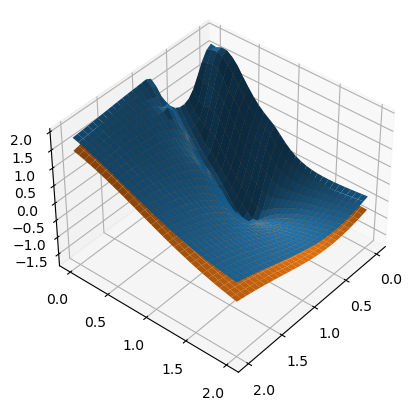

In [394]:
#plot gaussian process 1sd surfaces
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surface = ax.plot_surface(x1v,x2v,np.reshape(vmean + np.diag(vcovariance), (m,m)))
surface = ax.plot_surface(x1v,x2v,np.reshape(vmean - np.diag(vcovariance), (m,m)))
ax.view_init(40, 40)
plt.show()